In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.util import ngrams
from wordcloud import WordCloud
from collections import Counter
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import twint
import nest_asyncio
import datetime as dt
import seaborn as sns
from textblob import TextBlob
from nltk import pos_tag
from nltk import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
!pip install wordcloud
!pip install textblob

In [3]:
!pip3 install scipy

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
tweet = pd.read_csv("tweets.csv", dtype = "string")

In [6]:
tweet_data = tweet.head(696)

In [7]:
tweet_data.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. No its not a clickbait, @Qola...",Carkingga,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,<NA>,<NA>
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨 💰#Binance Spot💰 ⬇ Recommendation: #...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! Le...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1


In [8]:
tweet_data = tweet_data.drop_duplicates(subset = ["text"])
tweet_data = tweet_data.dropna(subset = ["text"])

In [9]:
def convert_to_text(dataframe):
    text = ""
    for i in dataframe['text']:
        text = text+i
    return text

In [10]:
text = convert_to_text(tweet_data)

In [11]:
def remove_links(text):
    result = re.sub(r'http\S+', '', text, flags=re.MULTILINE)
    return text
#source https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python

In [12]:
text = remove_links(text)

In [13]:
def remove_specialwords(text):
    filteredText=re.sub('[^A-Za-z0-9.]+', ' ',text)
    return filteredText
#source https://medium.com/@maheshpardeshi002/removing-special-characters-or-tags-from-text-in-data-pre-processing-using-python-5fa62f886956

In [14]:
text = remove_specialwords(text)

In [15]:
def word_tokenizer(text):
    tokens = word_tokenize(text)
    return tokens
tokens = word_tokenize(text)
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in tokens if not w.lower() in stop_words]
    return filtered_tokens
tokens = remove_stopwords(tokens)
def stemming(tokens):
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(words_sent) for words_sent in tokens]
    return stemmed_tokens
def lemmetization(tokens):
    lemmatizer = WordNetLemmatizer()
    lem_sent = [lemmatizer.lemmatize(words_sent) for words_sent in tokens]
    return lem_sent
def remove_punct(token):
     return [word for word in token if word.isalpha()]
tokens = remove_punct(tokens)

In [16]:
tokens = stemming(tokens)

In [17]:
tokens = lemmetization(tokens)

In [18]:
def bigrams(tokens):
    bi_grams = ngrams(tokens , 2)
    return list(bi_grams)

In [19]:
def trigrams(tokens):
    tri_grams = ngrams(tokens , 3)
    return list(tri_grams)

In [20]:
bi_grams = bigrams(tokens)
tri_grams = trigrams(tokens)

In [21]:
def bigrams_analysis(bi_grams):
    count_bigrams = FreqDist(bi_grams)
    dic_bigrams = dict(Counter(count_bigrams))
    return dic_bigrams  

In [22]:
def trigrams_analysis(tri_grams):
    count_trigrams = FreqDist(tri_grams)
    dic_trigrams = dict(Counter(count_trigrams))
    return dic_trigrams

In [23]:
bigrams_count = bigrams_analysis(bi_grams)
trigrams_count = trigrams_analysis(tri_grams)

In [24]:
def bigrams_analysis(bigrams):
    n = len(bigrams)
    bigrams_list = list(bigrams.items())
    swapped = False
    for i in range(n-1):
        for j in range(0, n-i-1):
            if bigrams_list[j][1] < bigrams_list[j + 1][1]:
                swapped = True
                bigrams_list[j], bigrams_list[j+1] = bigrams_list[j+1] , bigrams_list[j]         
        if not swapped:
            return
    common_bigrams = []
    common_bigrams_count = []
    for i in range(10):
        common_bigrams.append(str(bigrams_list[i][0]))
        common_bigrams_count.append(bigrams_list[i][1])
    
    plt.bar(common_bigrams, common_bigrams_count, color = "blue" , width = 0.5)

In [25]:
def trigrams_analysis(trigrams):
    n = len(trigrams)
    trigrams_list = list(trigrams.items())
    swapped = False
    for i in range(n-1):
        for j in range(0, n-i-1):
            if trigrams_list[j][1] < trigrams_list[j + 1][1]:
                swapped = True
                trigrams_list[j], trigrams_list[j+1] = trigrams_list[j+1] , trigrams_list[j]         
        if not swapped:
            return
    common_trigrams = []
    common_trigrams_count = []
    for i in range(10):
        common_trigrams.append(str(trigrams_list[i][0]))
        common_trigrams_count.append(trigrams_list[i][1])
    
    plt.bar(common_trigrams, common_trigrams_count, color = "blue" , width = 0.5)

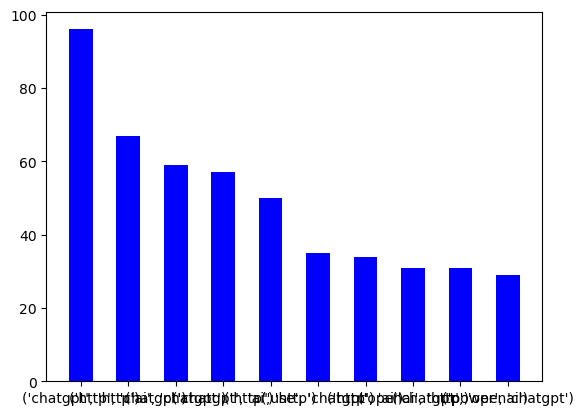

In [26]:
bigrams_analysis(bigrams_count)

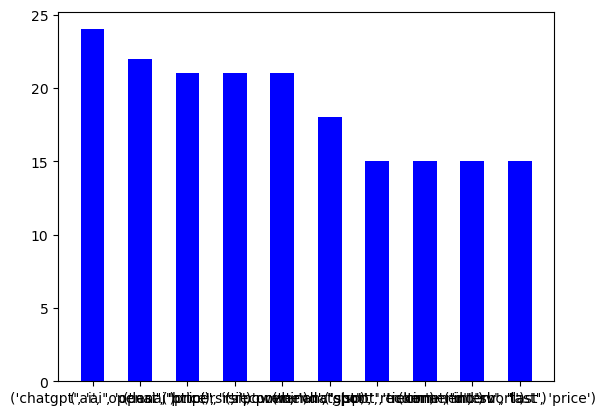

In [27]:
trigrams_analysis(trigrams_count)

In [28]:
def word_cloud(final_text):
    final_words=" ".join(str(x) for x in final_text)
    wc = WordCloud(background_color="white",max_words=200,width=800, height=400).generate(final_words)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

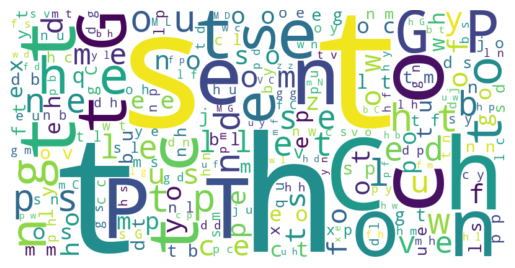

In [29]:
word_cloud(text)

In [30]:
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

In [31]:
sentiments_roberta = []
for i in tweet_data["text"]:
    tweet = i
    tweet = remove_links(tweet)
    tweet = remove_specialwords(tweet)
    encoded_tweet = tokenizer(tweet, return_tensors='pt')
    output = model(**encoded_tweet)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    negative = scores[0]
    positive = scores[1]
    neutral = scores[2]
    label = ""
    if negative > positive and negative > neutral:
        label = "negative"
    elif positive > negative and positive > neutral:
        label = "positive"
    elif neutral > positive and neutral > negative:
        label = "neutral"
    sentiments_roberta.append(label)
    


In [32]:
sentiments_textblob = []
for i in tweet_data["text"]:
    tweet = i
    tweet = remove_links(tweet)
    tweet = remove_specialwords(tweet)
    analysis = TextBlob(tweet)
    
    if analysis.sentiment[0]>0:
        label = "positive"
    elif analysis.sentiment[0]<0:
        label = "negative"
    else:
        label = "neutral"
    sentiments_textblob.append(label)

In [33]:
final_sentiments = []
for i in range(len(sentiments_roberta)):
    if sentiments_roberta[i] == sentiments_textblob[i]:
        final_sentiments.append(sentiments_textblob[i])
    else:
        final_sentiments.append(sentiments_roberta[i])
    

In [34]:
tweet_data.insert(12, "Sentiment" , final_sentiments ,True)

In [36]:
tweet_data

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,Sentiment
0,Bohmle,"#GPT4 for FREE. No its not a clickbait, @Qola...",Carkingga,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,neutral
1,<NA>,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,<NA>,<NA>,positive
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,neutral
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,neutral
4,Bitone Great,🚨Get Out!🚨 💰#Binance Spot💰 ⬇ Recommendation: #...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! Le...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Savvas Learning,Join Bryan Zevotek @BaldSci for two fabulous s...,"Paramus, NJ",Savvas Learning Company is a next-generation e...,2009-06-02 17:13:13+00:00,16420.0,8975.0,6436,False,2023-05-17 15:14:23+00:00,<NA>,Hootsuite Inc.,neutral
692,Shyam Arvadia,Has anyone else noticed that GPT - 4 has becom...,"Manhattan, NY",Grad student at NYU. Trying to find the next b...,2019-04-18 07:08:08+00:00,69.0,153.0,84,False,2023-05-17 15:14:00+00:00,"['ai', 'ChatGPT', 'OPENAI']",Twitter for iPhone,negative
693,Global Big Data Conference,Sam Altman calls for ‘incredible scrutiny’ of ...,"Santa Clara, CA",GLOBAL ARTIFICIAL INTELLIGENCE CONFERENCE Sep ...,2012-11-25 06:59:28+00:00,7947.0,4179.0,161,False,2023-05-17 15:13:44+00:00,<NA>,Twitter Web App,neutral
694,Torkild Smith,🌟 Enhance your business with cutting-edge AI t...,"Manchester, UK",Adopting an Innovative Data-Driven Strategy to...,2010-03-12 09:22:27+00:00,3052.0,4041.0,2187,False,2023-05-17 15:13:03+00:00,['ChatGPT'],Yuhanito,neutral


In [35]:
count_words = len(tokens)
print("number of words : " , count_words)

number of words :  12327


In [37]:
def check_space(string):
    count = 0
    for i in range(0, len(string)):
        if string[i] == " ":
            count += 1
    return count
count_spaces = check_space(text)

In [40]:
print("Number of spaces: ",count_spaces)

Number of spaces:  20136


In [39]:
count_characters = len(text)
print("number of characters are : " , count_characters)

number of characters are :  132561


In [54]:
def verb_finder(tokens):
    tokens_tagges = pos_tag(tokens)
    verb_count = 0
    for tagged_token in tokens_tagged:
        if tagged_token[1] == 'VB' or tagged_token[1] == 'VBD' or tagged_token[1] == 'VBG' or tagged_token[1] == 'VBN' or tagged_token[1] == 'VBP' or tagged_token[1] == 'VBZ':
            verb_count +=1
    return verb_count

In [55]:
count_verbs = verb_finder(tokens)
print("The total number of verbs are : " , count_verbs)

NameError: name 'tokens_tagged' is not defined

In [47]:
def starts_with_nameletter(tokens):
    count = 0
    for item in tokens:
        if item.startswith("M") or item.startswith("m"):
            count += 1
    return count

In [49]:
count_A = starts_with_nameletter(tokens)
print("words starting with M are : ", count_A)

words starting with M are :  540


In [50]:
sent_tokens = sent_tokenize(text)

In [51]:
count_sentence_tokens = len(sent_tokens)
print("number of sentence tokens are : " , count_sentence_tokens)

number of sentence tokens are :  542


In [52]:
specialCharCount = 0
for char in text:
    if not (char.isalnum() or char.isspace()):
        specialCharCount += 1
print("number of special characters are : " , specialCharCount)

number of special characters are :  1491


In [56]:
data = [count_sentence_tokens, count_words, count_spaces, count_characters, count_A, specialCharCount]

In [57]:
features_list = ["sentence length" , "word count" , "space count" , "char count"  , "name count" , "special char count"]

In [58]:
data_ = {
    "Features" : features_list,
    "Count" : data
}

In [59]:
#I have excluded verbs

In [60]:
features = pd.DataFrame(data_)

In [61]:
features

,Features,Count
0,sentence length,542
1,word count,12327
2,space count,20136
3,char count,132561
4,name count,540
5,special char count,1491


In [62]:
tfIdf_vectorizer = TfidfVectorizer()

In [63]:
tfIdf_vectorizer.fit(text)

ValueError: Iterable over raw text documents expected, string object received.